# 绘图与可视化

重点：pandas、matplotlib、seaborn基本绘图方法，常见图表类型，常见绘图参数。

## 9.1 简明matplotlib API入门

In [10]:
import matplotlib.pyplot as plt #导入惯例
import seaborn as sns

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

pd.set_option('display.max_rows', 10)

%matplotlib notebook
#在jupyter notebook中使用matplotlib库直接输出绘图结果的魔术命令。具有良好的交互性。

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


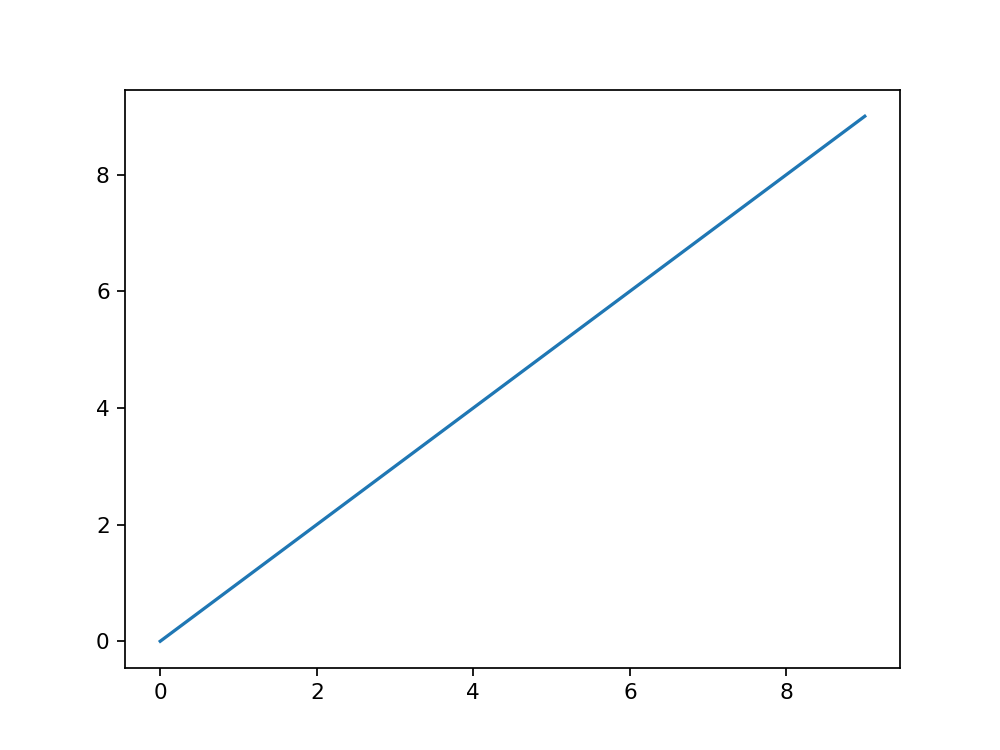

In [8]:
plt.plot(data)
#在其他IDE中，还需要plt.show()命令。

### 9.1.1 图片与子图

matplotlib所绘制的图位于图片对象中（Figure）。

    使用plt.figure生成一个新图片对象，但还不能直接使用空白的图片进行绘图。
    需要使用figure对象的add_subplot方法创建一个或多个子图（subplot）。

<IPython.core.display.Javascript object>


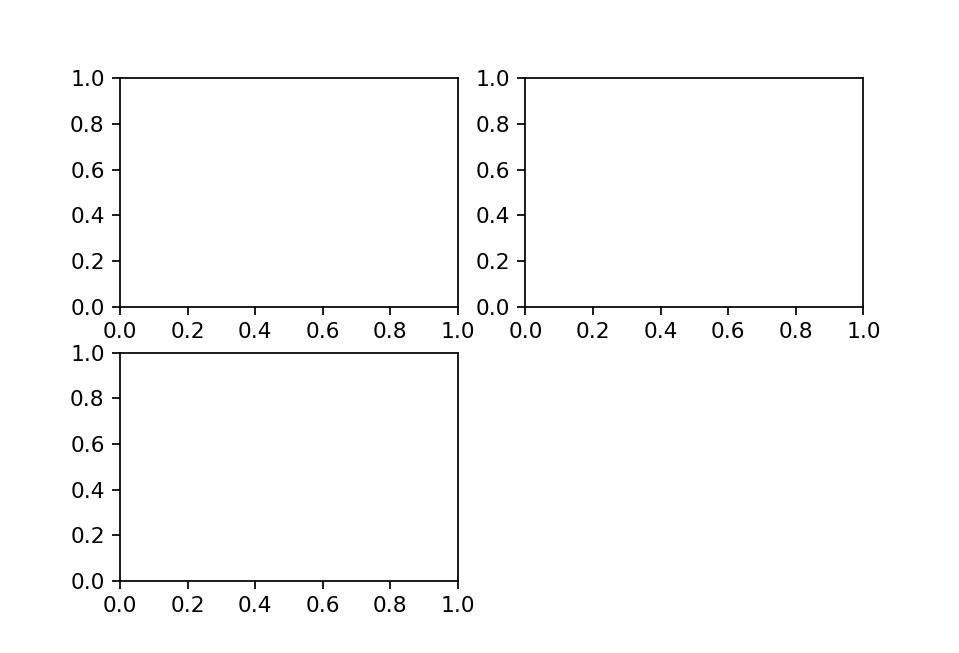

In [11]:
fig = plt.figure()
#plt.figure()生成一个fig对象。空白图片，并且无法直接绘图。

In [12]:
ax1 = fig.add_subplot(2,2,1)
#生成2x2个子图，并且选择了第1个子图（顺序从1开始）。命令运行后上面fig会出现对应的显示。

#对于复杂的图表，绘图命令最好放置在同一个cell中。

In [13]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#虽然没有显示第四个子图，但它仍然是存在的（待选）。

将上述命令写在一个单元格中：

<IPython.core.display.Javascript object>


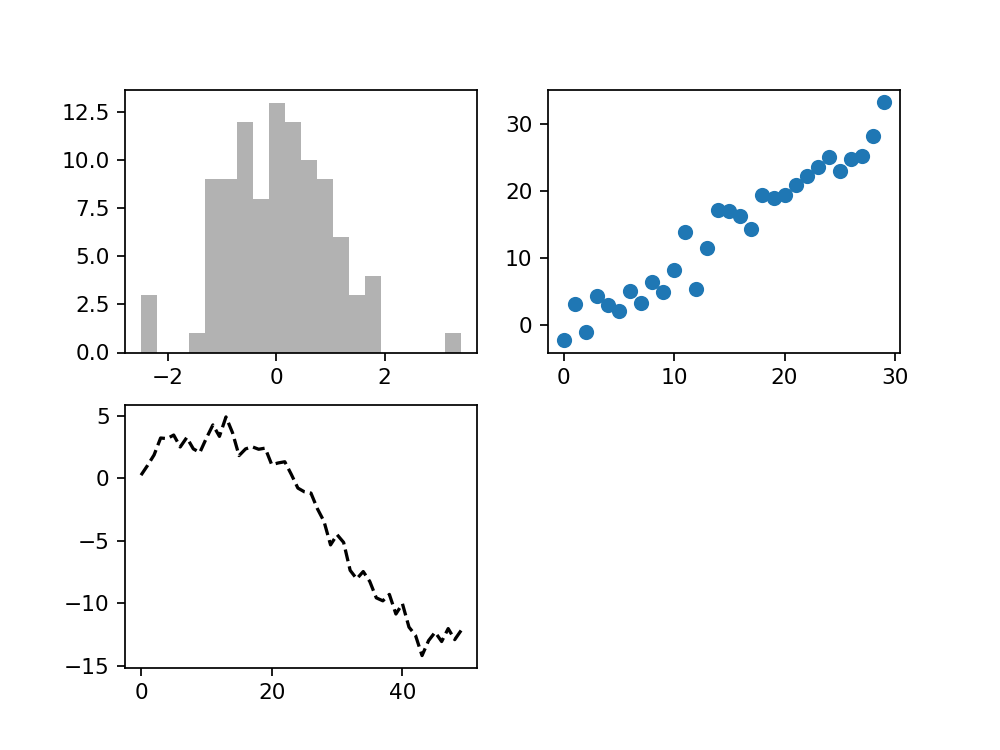

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#plt.plot()会在最后一个图片和子图上进行绘制。

In [20]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

#'k--'是用于绘制黑色分段线的style选项

In [21]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
#hist生成直方图。参数后面会详解。
#alpha指透明度。

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

使用子图网格创建图片是非常常见的任务。plt.subplots方法用于创建一个新的图片，然后返回包含了已生成子图对象的Numpy数组：

<IPython.core.display.Javascript object>


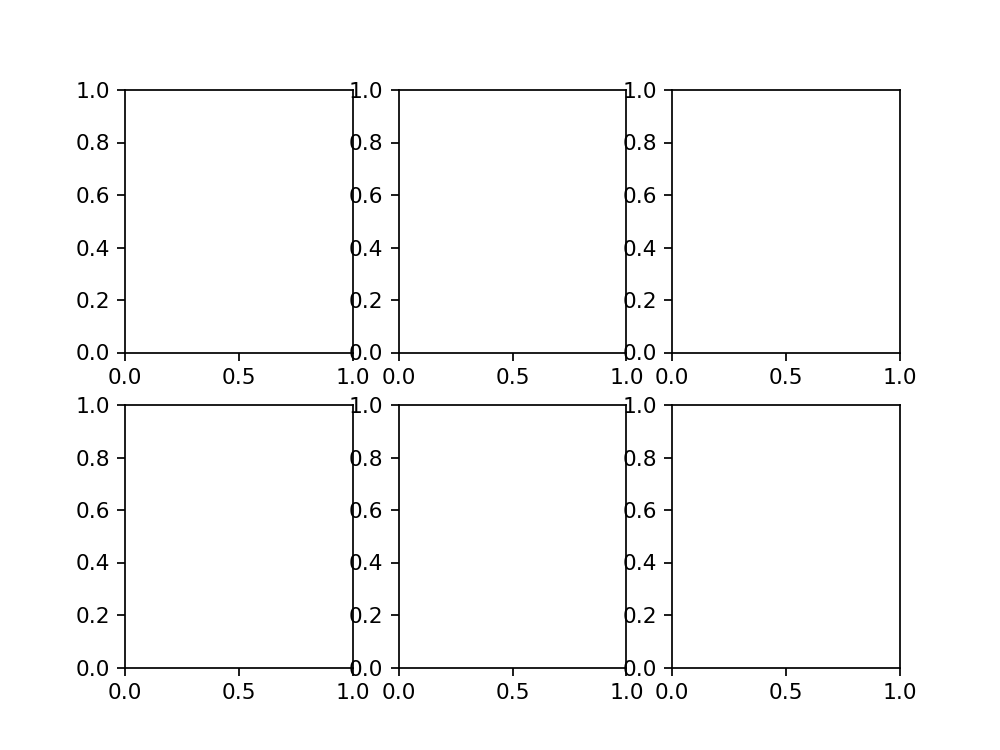

In [22]:
fig, axes = plt.subplots(2,3)

#一次性完成生成新fig对象和子图对象的过程。

In [23]:
type(fig)

matplotlib.figure.Figure

In [24]:
type(axes)

numpy.ndarray

注意到axes是np数组。这利于对axes进行二维数组式的索引，例如axes[0,1]。

    pyplot.subplots()的选项见P249：
    nrows: 子图的行数
    ncols: 子图的列数
    sharex: 所有子图使用相同的x轴（y轴可以不同）
    sharey: 所有子图使用相同的y轴

#### 9.1.1.1 调整子图周围的间距

使用fig的subplots_adjust方法更改间距：

    subplots_adjust(left=None, bottom=None, right=None, top=None,
                              wspace=None, hspace=None)
    wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。
    
也可以用作顶层函数plt.subplots_adjust()

<IPython.core.display.Javascript object>


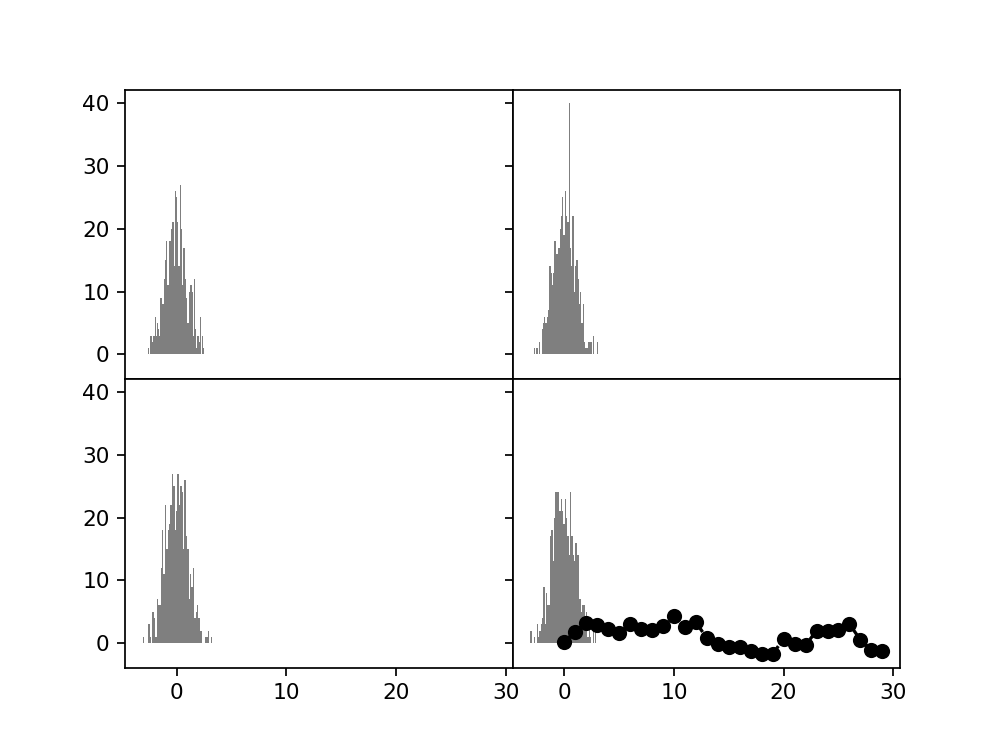

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
#常见的处理二维数组的嵌套for循环
        
plt.subplots_adjust(wspace=0, hspace=0)
#顶层函数。也可以作为fig的方法使用。

### 9.1.2 颜色、标记和线类型

matplotlib的主函数plot接受带有x轴和y轴的数组，以及一些可选的字符串缩写参数来指明颜色和线类型。

    如ax.plot(x, y, 'g--')。其中g指颜色green，--指虚线。是一种字符串缩写表达了两个style参数。
    在编程中，可以显式地指明，如ax.plot(x, y, linestyle='--', color='g')。
        linestyle参数指明线的类型，color参数指明线的颜色。
    
    折线图可以有标记用来凸显数据点。在样式字符串中，需要跟在颜色后面，如'ko--'
        
    常见style参数：
    linestyle 线的类型
    color 线的颜色
    marker 标记

In [30]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
# 样式参数等价于 'ko--'

<IPython.core.display.Javascript object>


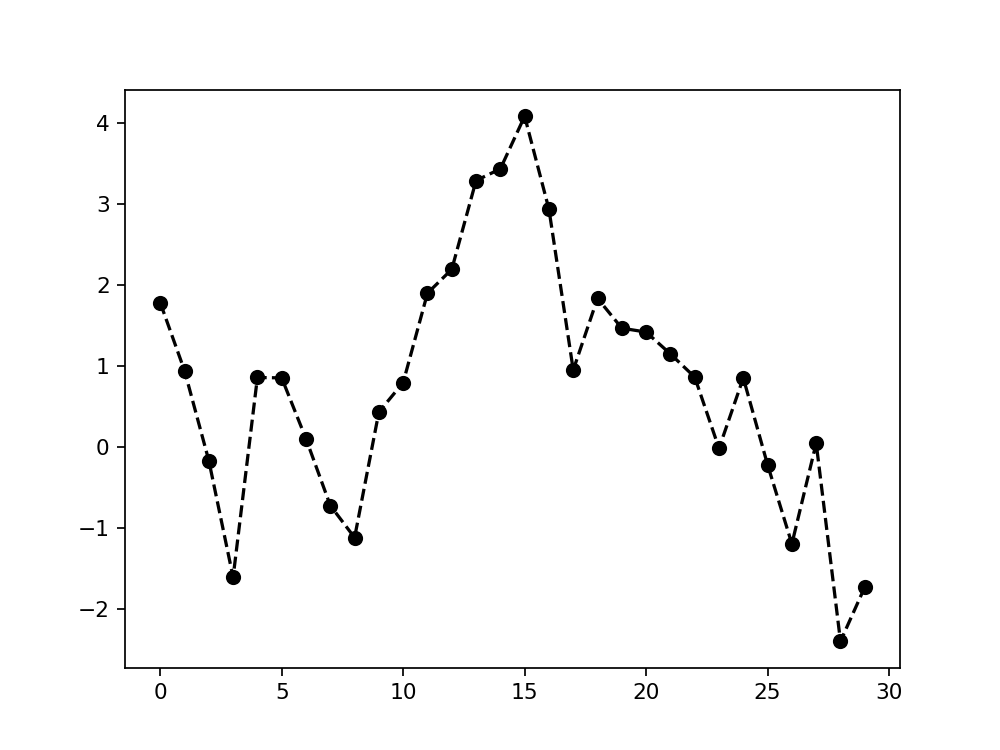

In [35]:
#上面的命令会在最后一个图片的最后一个子图上进行绘图。因此需要重新生成一个fig对象。

plt.figure()
#fig,axes = plt.subplots(1,1) 等价于这行命令

plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [36]:
plt.close('all')
#关掉所有图片（的交互式界面）。后面新生成的交互式图，名字将从1重新开始命名。

<IPython.core.display.Javascript object>


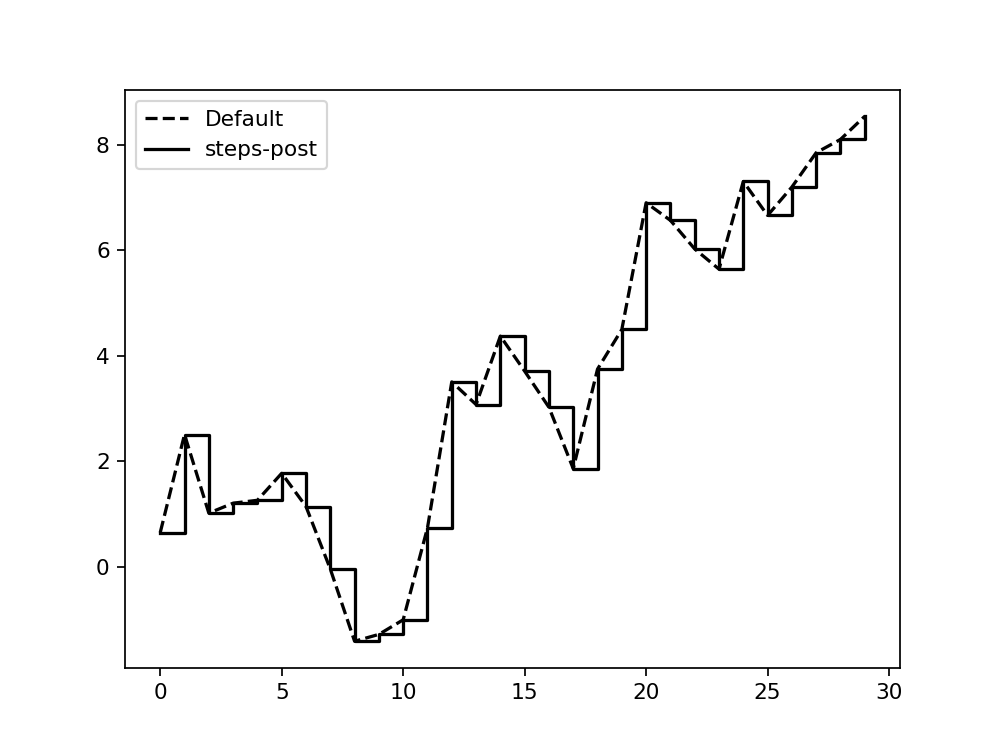

In [37]:
plt.figure()
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default') #生成默认的折线图，并给这条线命名Default
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')  #plt.legend()用以显示图例，loc参数是图例的位置。

### 9.1.3 刻度、标签和图例

对于大多数图表修饰工作，主要有两种方式：程序性的pyplot接口；面向对象的原生matplotlib API。

#### 9.1.3.1 设置标题、轴标签、刻度和刻度标签

常用方法和参数：
    
    ax.set_title() 为子图命名
    ax.set_xlabel() 为x轴命名
    ax.set_xticks() 为x轴指定刻度
    ax.set_xtickslabels() 为x轴的刻度命名
    
并且，轴的类型拥有一个set方法，允许批量设置绘图属性。

<IPython.core.display.Javascript object>


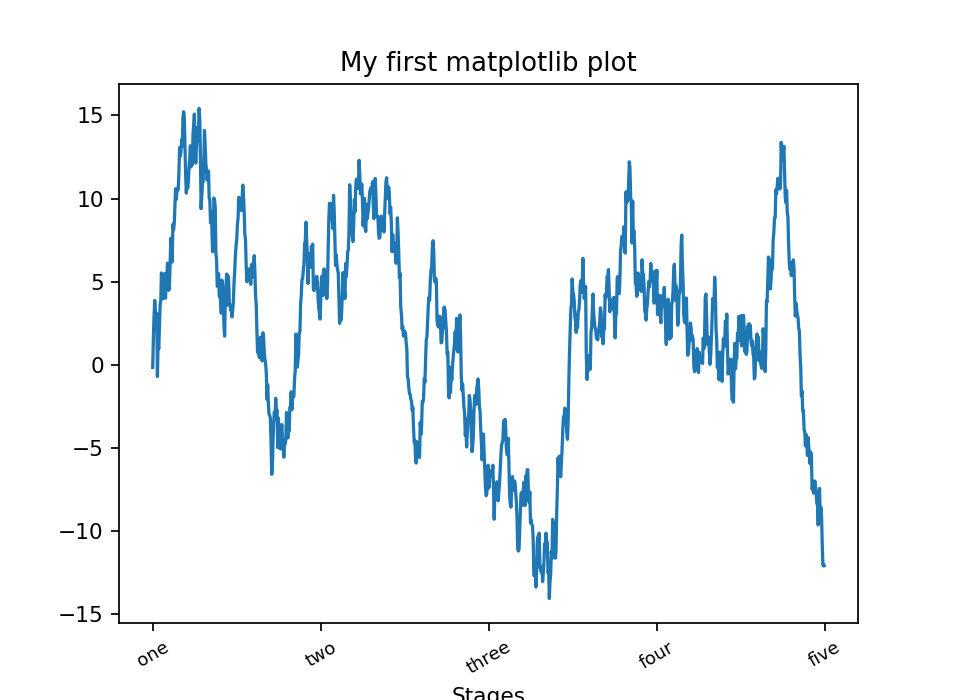

In [44]:
#fig = plt.figure()
#plt.plot(np.random.randn(1000).cumsum())
#这种绘图方式，并没有显式的指定绘图对象，而是使用了默认逻辑，即在最后一个图的最后一个子图上作图。

#建议使用规范的程序化风格：
fig,ax = plt.subplots(1,1)
ax.plot(np.random.randn(1000).cumsum())

要改变x轴刻度（y轴类似），最简单的方式是使用set_xticks和set_xticklabels。
    
    set_xticks 表示在数据范围内设定刻度的位置
    set_xtickslabels 为刻度标签赋值

In [45]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
#设定ax的x轴刻度。传入一个列表。

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
#rotation参数会将轴刻度标签旋转30度

ax.set_title('My first matplotlib plot')
#set_title为图命名。传入一个字符串

ax.set_xlabel('Stages')
#set_xlabel为x轴命名。

Text(0.5, 38.6284722222222, 'Stages')

并且，轴的类型拥有一个set方法，允许批量设置绘图属性。

    props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
    }
    ax.set(**props)

#### 9.1.3.2 添加图例

添加图例的简便方法是，在添加每个图表时传递label参数。

<IPython.core.display.Javascript object>


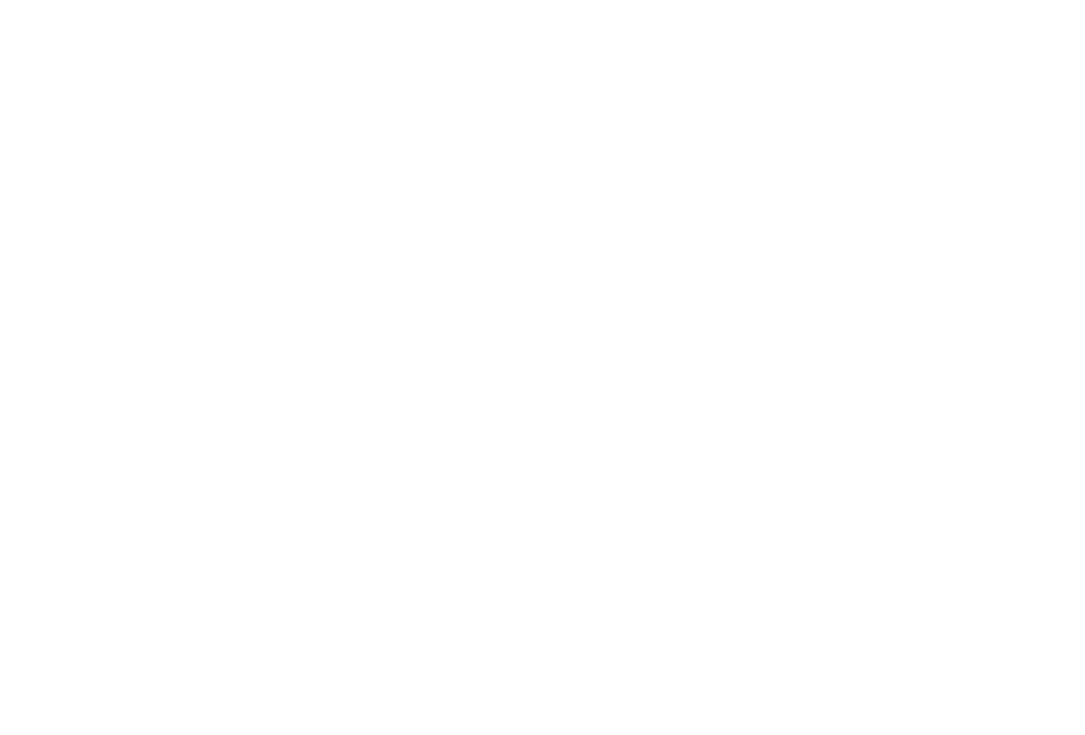

In [53]:
data1 = np.random.randn(1000).cumsum()
data2 = np.random.randn(1000).cumsum()
data3 = np.random.randn(1000).cumsum()

fig,ax = plt.subplots(1,1)

ax.plot(data1, 'k', label='one')
ax.plot(data2, 'r--', label='two')
ax.plot(data3, 'g.', label='three')

ax.set_title('Colorful Lines')
ax.legend(loc='best')

#参考文档字符串 ax.legend?  

### 9.1.4 注释与子图加工

常见的注释有文本、箭头以及其他图形。使用text、arrow和annote方法添加注释和文本。
    
    text在图表上给定的坐标(x,y)，根据可选的定制样式绘制文本：
        ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
        
    1. plt.annotate(s, xy, *args, **kwargs)
        使用文本s给点xy处做注释。可以使用参数xytext达到同样的效果。
        可以使用参数arrowprops创造一个箭头，这个箭头从注释文本指向点xy。
        
        s : str
        The text of the annotation.
        
        xy : (float, float)
        The point *(x,y)* to annotate.
       
        xytext : (float, float), optional
        The position *(x,y)* to place the text at.
        If *None*, defaults to *xy*.

举例：标普500从2007年以来的收盘价，在图表中标注从2008年到2009年金融危机中的重要日期。

<IPython.core.display.Javascript object>


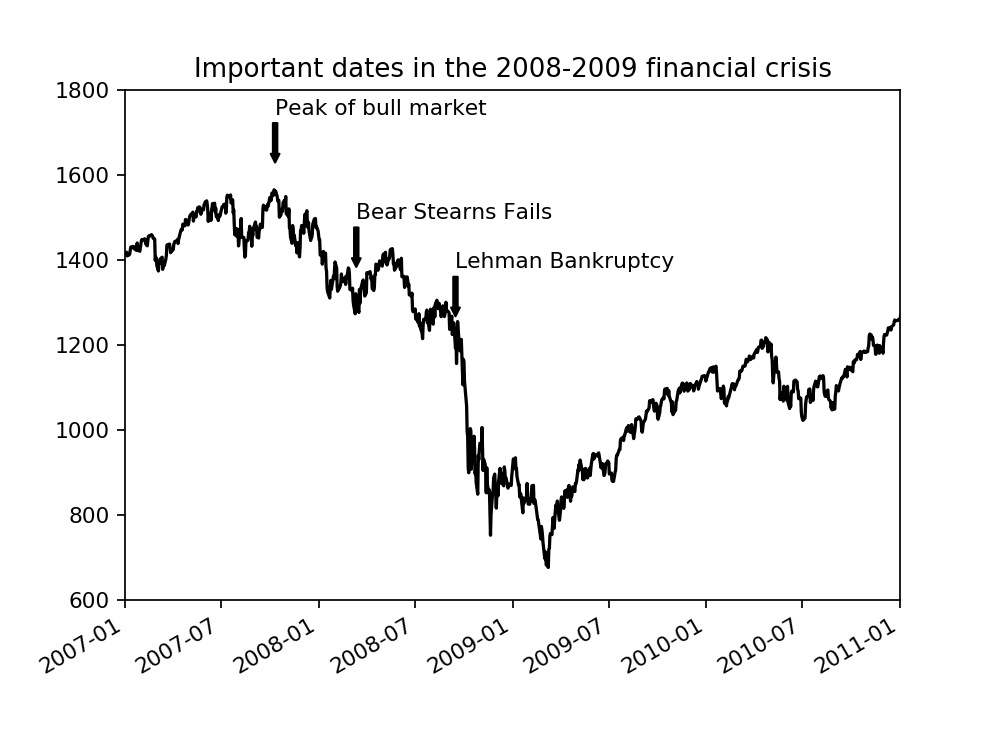

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [71]:
from datetime import datetime

Crisis = plt.figure()
ax = Crisis.add_subplot(1, 1, 1)

data = pd.read_csv(r'E:\Coding\Python\Python exercises\pydata-book-2nd-edition\examples\spx.csv', index_col=0, parse_dates=True)
#可以查看下data的前五行。这里使用未命名的第0列作为索引，并进行日期索引的解析。
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
#数据类型: list，列表的元素为三个元表

for date, label in crisis_data:  #文档字符串 plt.annotate?
    ax.annotate(label, xy=(date, spx.asof(date) + 75),   #使用label内容在xy位置进行注释。asof: 最后一行不是NaN值的值。
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                #箭头的设置，使用参数arrowprops创造一个箭头，这个箭头从注释文本指向点xy
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
#xlim函数设置轴数据的最大最小值范围

ax.set_title('Important dates in the 2008-2009 financial crisis')

#更多注释的例子，见在线matplotlib展览馆。

绘制图形时，要使用patches。在图表中绘制图形时，需要生成patch对象shp，并调用ax.add_patch(shp)将它添加到子图中。

<IPython.core.display.Javascript object>


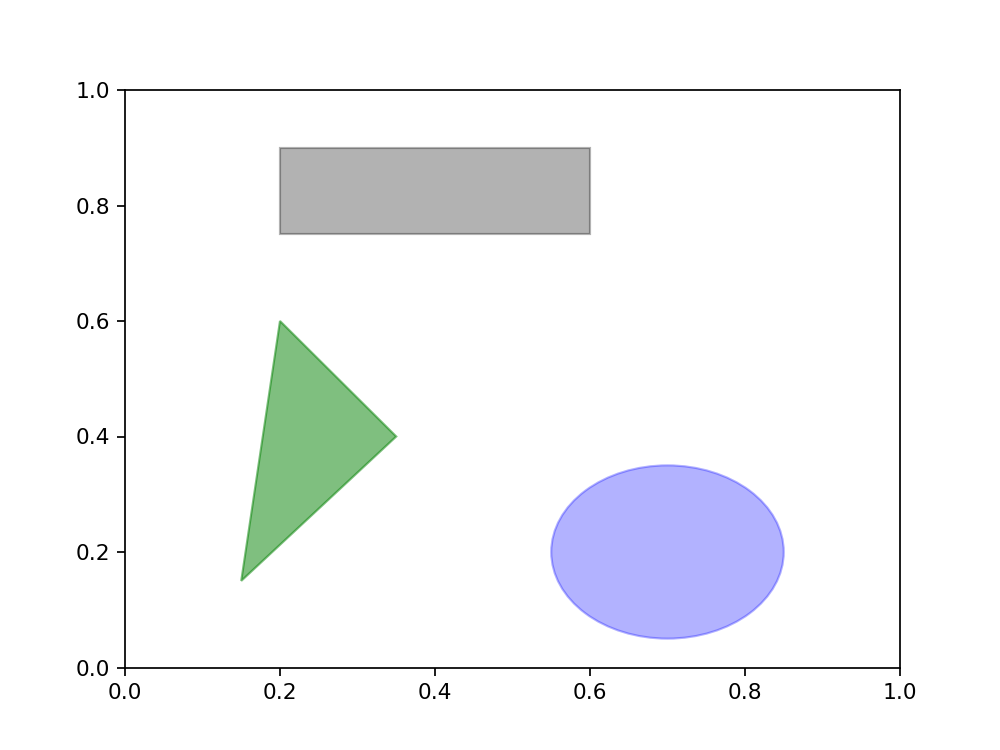

In [68]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

#绘制图形shp
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
#Rectangle(矩形)、Circle(圆)、Polygon(多边形)。第1个参数为位置参数，第2，3个参数为长、宽或者半径等参数。

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
#调用add_patch(shp)绘制图形

### 9.1.5 将图片保存到文件

plt.savefig将活动图片保存到文件。

    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
    第1个参数为保存路径以及文件类型，如pdf,png,jpg等。
    第2个参数dpi像素分辨率
    第3个参数bbox_inches修建实际图形的空白。tight参数除去空白部分。
    
    常见的参数还有：
    facecolor,edgecolor 子图之外的图形背景颜色，默认情况下是'w'（白色）

In [73]:
Crisis.savefig('Crisis.jpg',dpi=400,bbox_inches='tight')
Crisis.savefig('Crisispdf.pdf',dpi=400,bbox_inches='tight')

### 9.1.6 matplotlib设置

可以通过全局参数来定制默认行为，包括图形大小、子图间距、颜色、字体大小和网格样式等等。

使用rc方法。
    
    rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：
    font_options = {'family' : 'monospace',
                              'weight' : 'bold',
                              'size'   : 'small'}
                
    plt.rc('font', **font_options)
    
更深入的定制，参照matplotlib的设置文件matplotlibrc

## 9.2 使用pandas和seaborn绘图



### 9.2.1 线型图

大部分简易线型图可以由Series和DataFrame的plot方法绘制。

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例。

plot方法的参数主要有ax（绘制的子图选择）、style、label、alpha。详细见Page

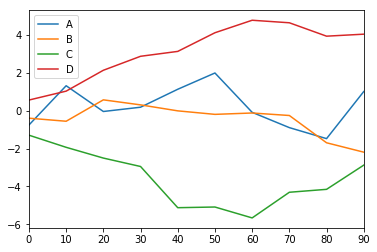

In [2]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()
#生成简易线型图

### 9.2.1 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度：

注：pd.value_counts().plot.bar() 频率直方图

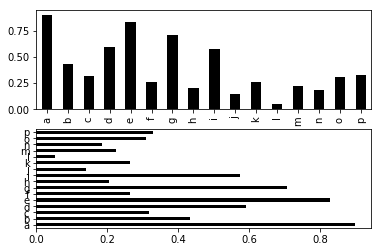

In [9]:
#目标：给定一个随机Series，分别就x轴和y轴生成柱状图

fig,axes=plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=1)
data.plot.barh(ax=axes[1],color='k',alpha=1)

#注意图表对象的生成是使用plt.subplots()，作图是使用pandas的plot方法（基于matplotlib）。

In [2]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.011314,0.480487,0.942131,0.761395
two,0.629615,0.691485,0.878296,0.798534
three,0.167857,0.088755,0.780254,0.528081
four,0.766680,0.728699,0.449565,0.715841
five,0.935132,0.679524,0.889576,0.681817
six,0.570179,0.905457,0.517295,0.883975


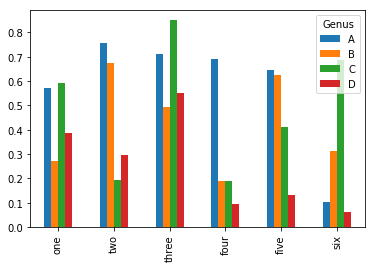

In [11]:
#尝试对这个df绘制柱状图

df.plot.bar()

#DF绘制柱状图，会根据索引分组，将每一行的数据分在一组进行显示。并注意到列名Genus被用作了图例的标题。

设置 stacked=True 即可为DataFrame生成[堆积柱状图]，这样每行的值就会被堆积在一起：

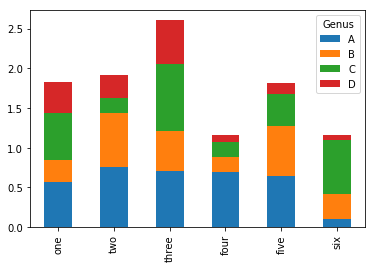

In [12]:
df.plot.bar(stacked=True)
#x轴上的堆叠图

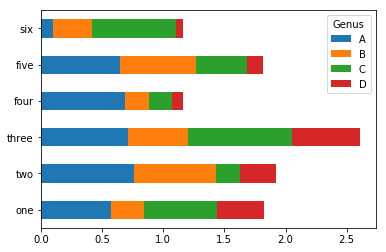

In [13]:
df.plot.barh(stacked=True)
#y轴上的堆叠图

In [15]:
plt.close('all')

以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比：

In [3]:
tips = pd.read_csv(r'E:\Coding\Python\Python exercises\pydata-book-2nd-edition\examples\tips.csv')
tips.head() 
#养成习惯，加载后初览数据结构

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
party_counts = pd.crosstab(tips['day'], tips['size']) #生成交叉表，后面会学习。这里初步可以看到，选取day作为索引，size作为列名。
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [5]:
#由于一人及以下和6人及以上的人数较少，不使用这些数据

party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [6]:
# 然后进行规格化，使得各行的和为1，并生成图表。
#复习笔记pandas notes。尝试用2种不同方法计算。

#方法一

party_pcts = party_counts.div(party_counts.sum(1), axis=0)
#这里使用了DF的广播运算 df1.div(df2/S,axis=0)。选择axis=0作为匹配轴。

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [7]:
#方法二

f = lambda x: x/x.sum()
pcts1 = party_counts.apply(f,axis=1)
#使用apply方法：将函数运用到低维数据上。apply方法默认在列上调用函数（即匹配轴axis=0）。

pcts1

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


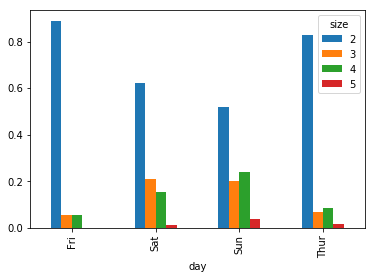

In [8]:
pcts1.plot.bar()
#可以看到聚会规模在周末会变大

### 9.2.2 直方图和密度图

直方图是一种对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图。

重点方法：
        
        plot.hist(bins=n)
        plot.density()
        sns.distplot(values, bins) 

再以前面那个小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费总额百分比”的直方图：

In [12]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [13]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<IPython.core.display.Javascript object>


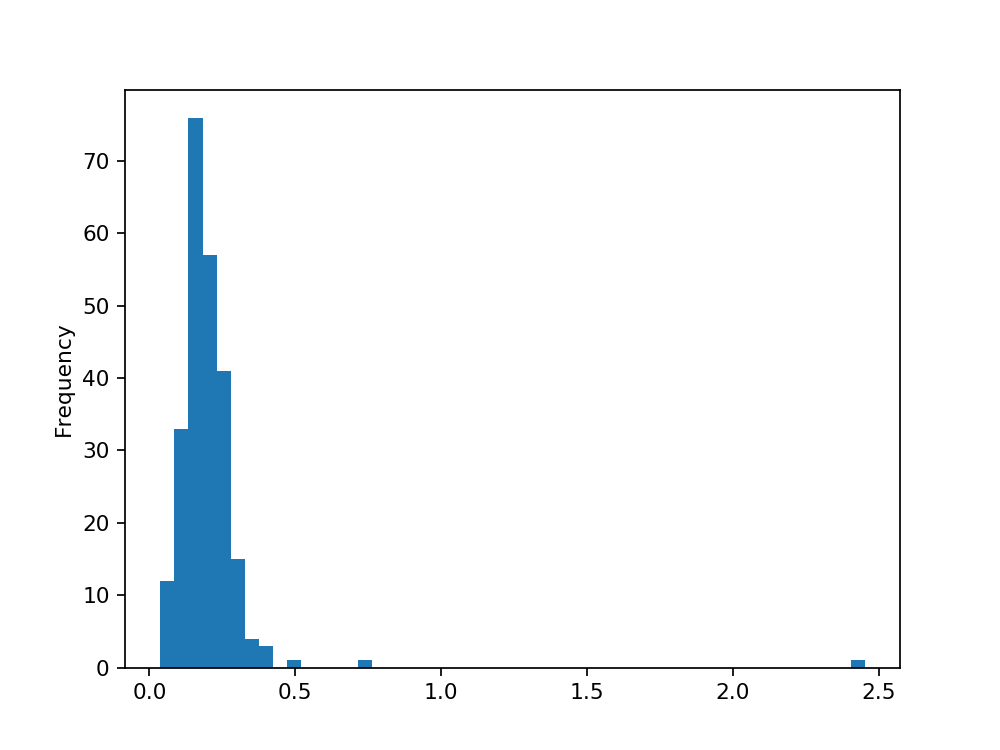

In [23]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)
#参数bins=n是对变量范围的等分数(划分为多少个区间)。即(max-min)/n。

使用Series的plot.density()方法生成核密度图（连续化概率分布）：

<IPython.core.display.Javascript object>


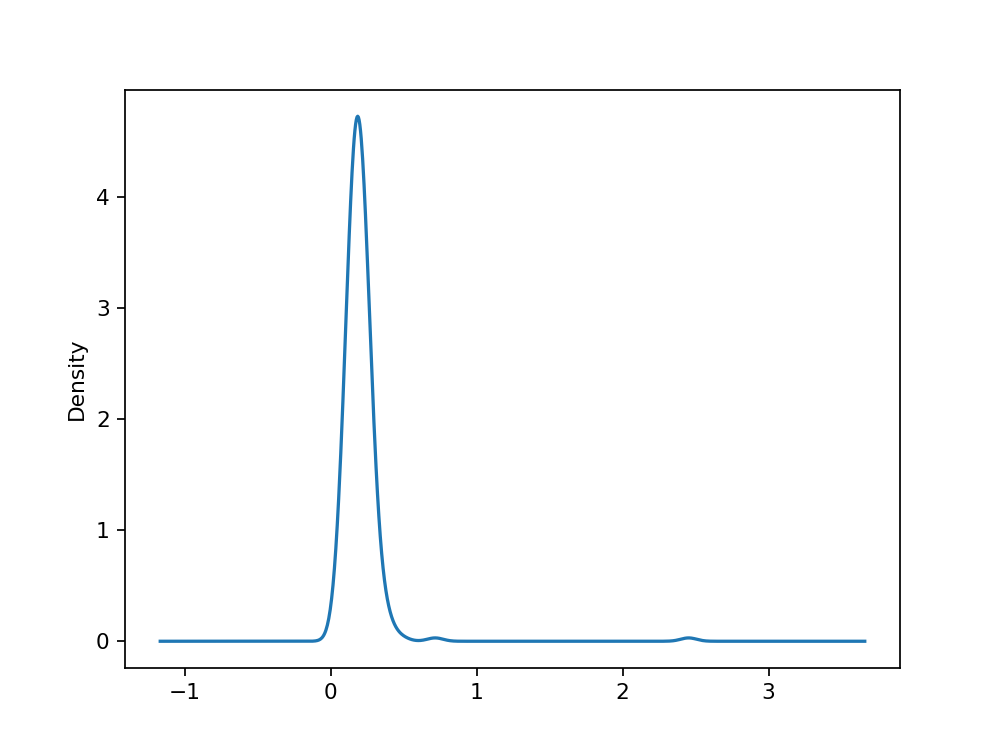

In [24]:
plt.figure()
tips['tip_pct'].plot.density()

使用seaborn的distplot方法可以同时生成直方图和密度图：

<IPython.core.display.Javascript object>


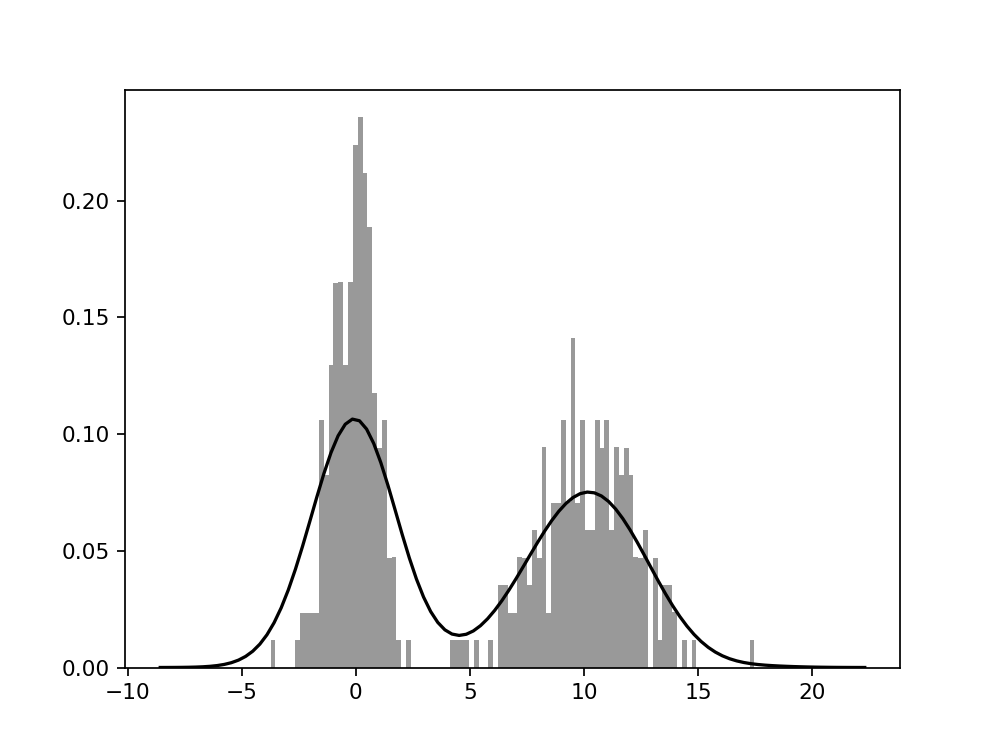

In [25]:
plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
#concatenate聚合数据

sns.distplot(values, bins=100, color='k')

### 9.2.3 散布图或点图 

点图或散布图用以观察两个一维数据序列之间的关系。

seaborn的regplot方法，它可以做一个散布图，并加上一条线性回归线。

下面这个例子来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

In [26]:
macro = pd.read_csv(r'E:\Coding\Python\Python exercises\pydata-book-2nd-edition\examples\macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
#diff()计算一阶差分

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


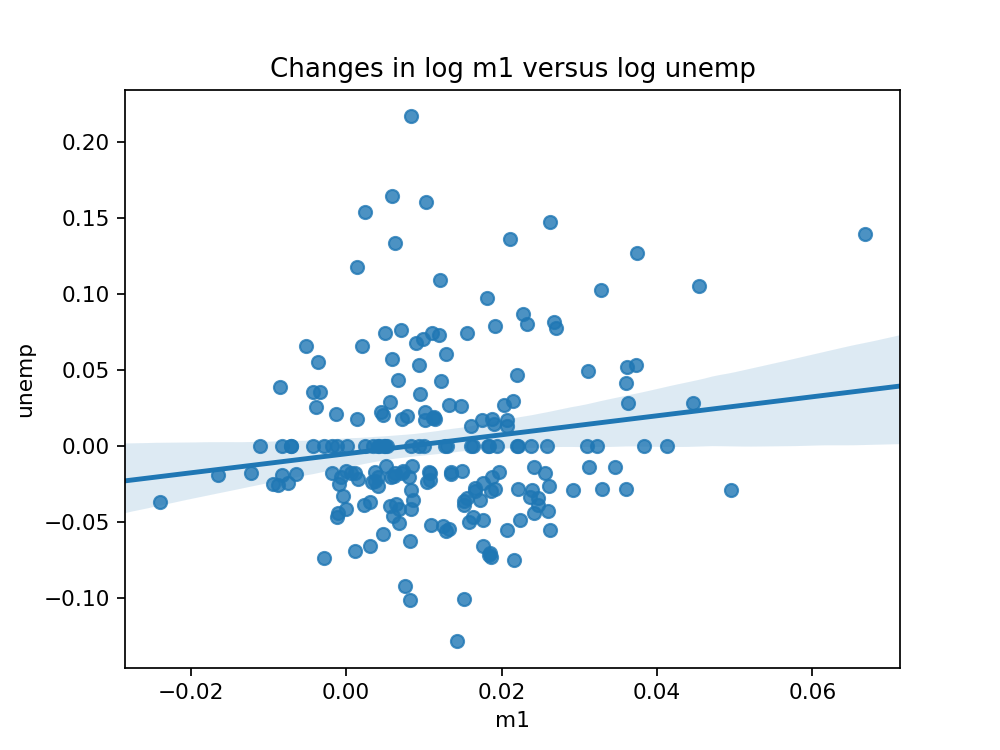

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [29]:
plt.figure()

sns.regplot('m1', 'unemp', data=trans_data)
#x，y轴坐标变量（对应于data选取的数据集），data是数据集。

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

散布图矩阵（scatter plot matrix）：在探索式数据分析工作中，有时需要同时观察一组变量的散布图。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计：

plot_kws参数可以传递配置选项到非对角线元素上的图形。对于更详细的配置选项，可以查阅seaborn.pairplot文档字符串。

<IPython.core.display.Javascript object>


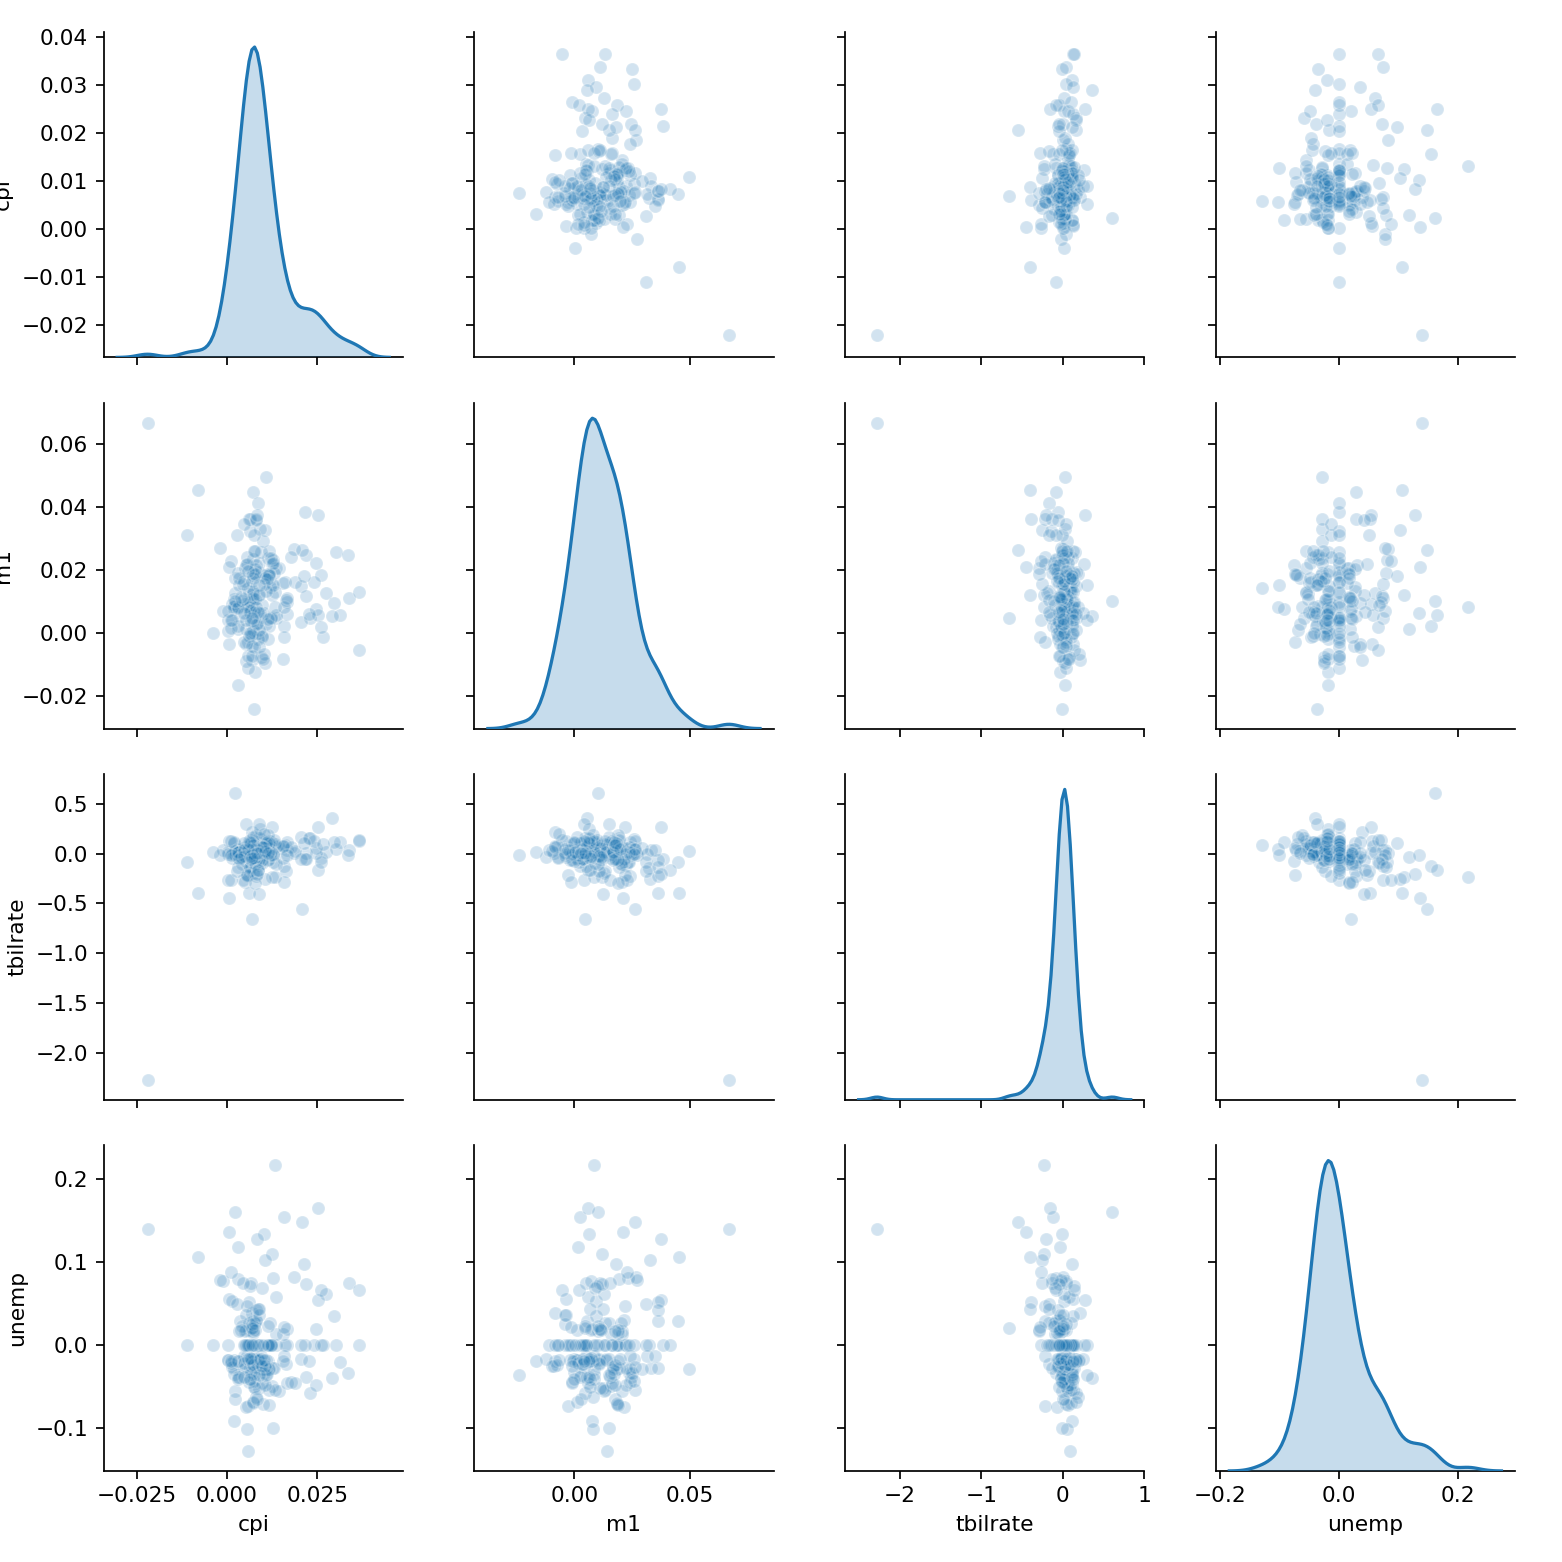

In [30]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
#第一个参数传递数据集，第二个参数选择对角线位置每个变量的直方图或核密度图，第三个是配置参数以供非对角线图表使用。

#注意到sns.pairplot自己生成了一个figure对象。

### 9.2.4 分面网格和类型数据

如果数据集有额外的分组维度，有多个分类变量的数据可视化的一种方法是使用小面网格。结构上类似subplots子图，但是根据变量进行分组。

seaborn有一个有用的内置函数catplot，可以简化制作多种分面图。

类比matplotlib的子图控制，seaborn用col和rows控制子图排列。

<IPython.core.display.Javascript object>


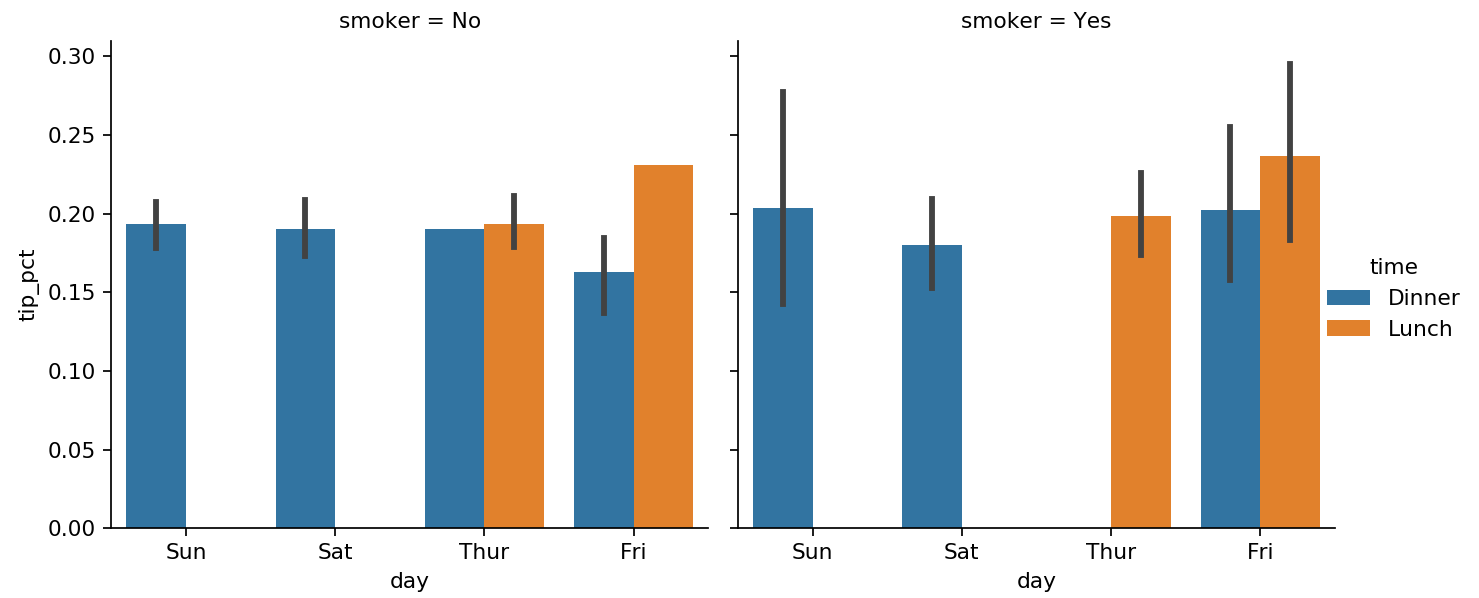

In [35]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

#catplot方法可以多维度分组画图。x，y参数选择横纵坐标的变量，hue为绘图图线分组变量，col为另一维分组变量。kind为图表类型，data为待选数据集。
#col控制列上子图的分组。

<IPython.core.display.Javascript object>


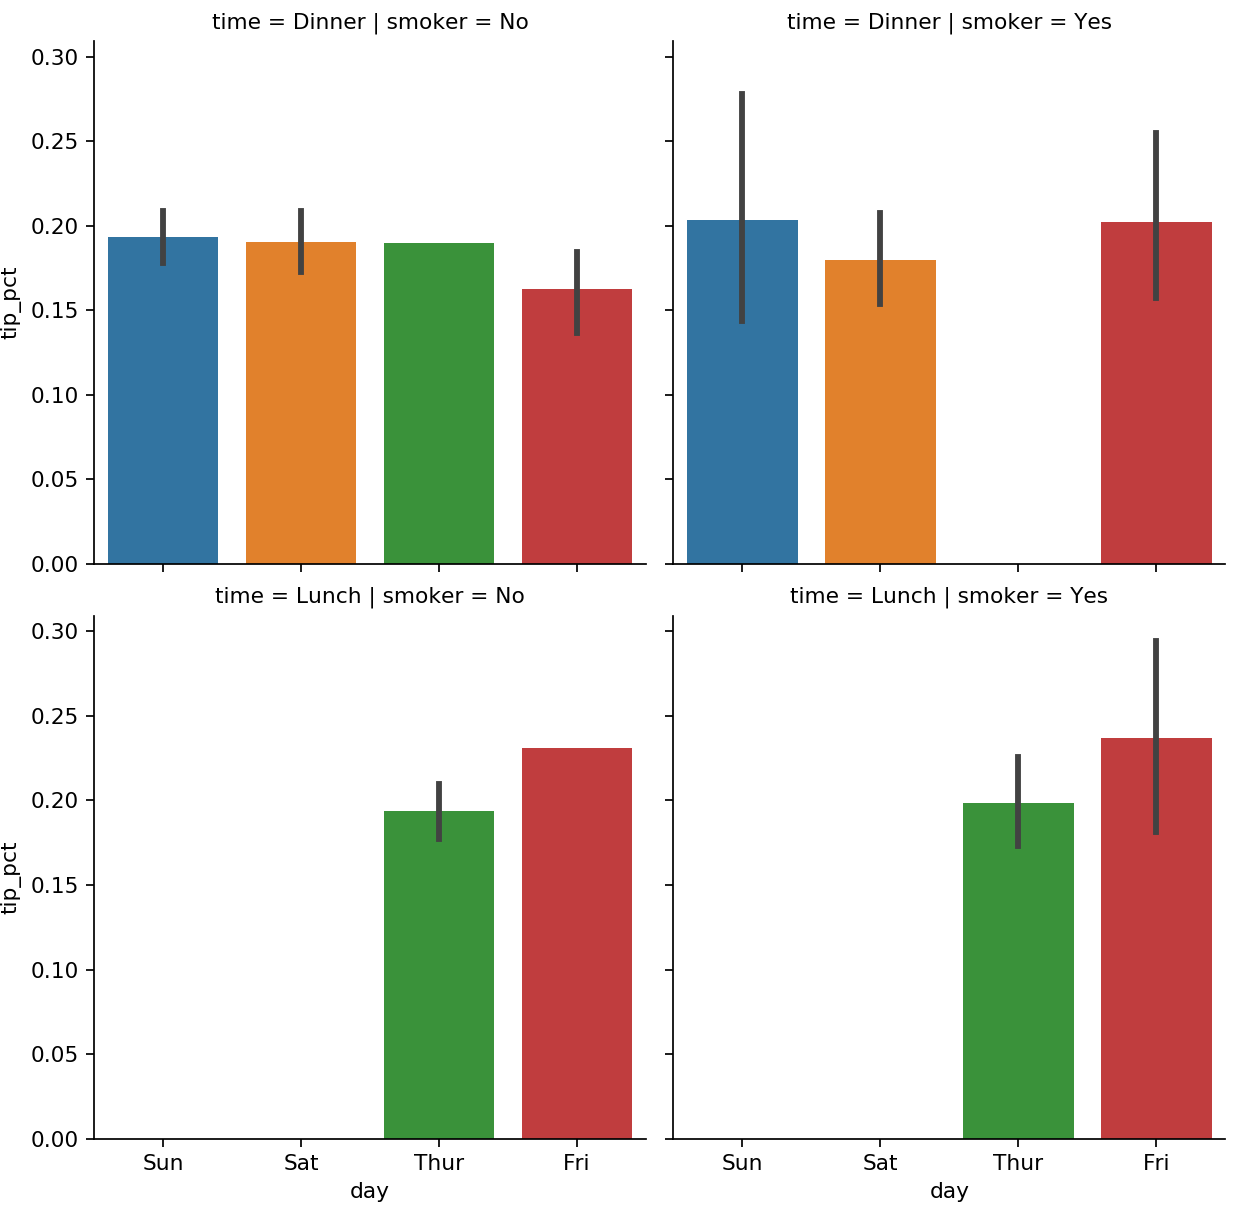

In [39]:
sns.catplot(x='day', y='tip_pct', 
                  col='smoker', row='time',
                  kind='bar', data=tips[tips.tip_pct < 1])

#col在列方向按传递变量分组绘制子图，row在行方向按传递变量分组绘制子图

盒图（它可以显示中位数，四分位数，和异常值）是一个有用的可视化类型。

使用更通用的seaborn.FacetGrid类，你可以创建自己的分面网格。请查阅seaborn的文档。

<IPython.core.display.Javascript object>


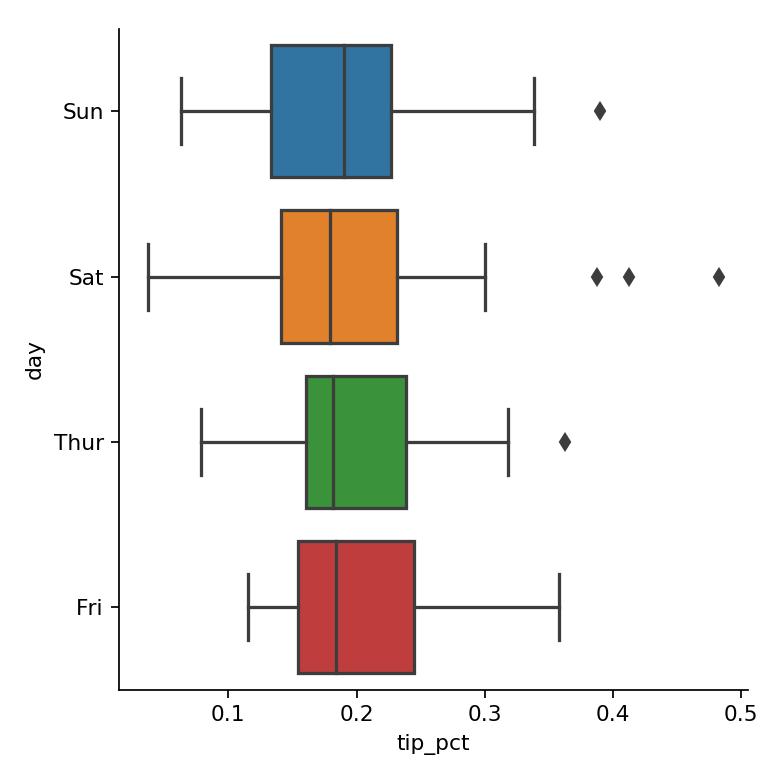

In [40]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

更多的绘图方法，参考在线文档。